# Sensor Based Activity Recoginition 
Challenge: cdl1 - Sensor based Activity Recognition  
Team: Lea Bütler, Manjavy Kirupa, Etienne Roulet, Si Ben Tran  

Aufgabe: 
- Bereinigung der Sensordaten
- Visualiserung der Sensordaten

Hier in diesem Notebook fuehren wir die Bereingung der aufgenommenen Sensordaten von jedem Teilnehmer der Challenge durch. Weiter visualisieren wir anschliessend die Sensordaten getrimmt und ungetrimmt. 

---

# Libraries Importieren

In [67]:
# Data Science Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

---
# Daten einlesen

- Einlesen der Daten
- Einlesen der gefilterten Daten von 'all-sensormeasurement-plots'

In [2]:
# File: Alle_Messungen.csv einlesen 
data_raw = pd.read_csv('Alle_Messungen.csv', sep=',', index_col=0)
# convert time column to datetime
data_raw['time'] = pd.to_datetime(data_raw['time'])
# display first 5 rows of data_raw
display("data raw", data_raw.head(5))

'data raw'

,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class,id_combined
0,2023-02-27 15:02:04.548,0.000,-3.552,-9.140,NaN,NaN,NaN,NaN,NaN,NaN,0.161765,-0.088290,-0.470671,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
1,2023-02-27 15:02:17.156,0.000,9.722,1.278,NaN,NaN,NaN,NaN,NaN,NaN,-0.217750,-0.719579,0.631111,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
2,2023-02-27 15:02:31.574,-0.728,9.779,0.000,NaN,NaN,NaN,NaN,NaN,NaN,-0.420650,0.568356,-0.598058,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
3,2023-02-27 15:02:16.685,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,43.5,-13.143750,NaN,NaN,NaN,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
4,2023-02-27 15:02:32.295,NaN,NaN,NaN,NaN,NaN,NaN,-13.012501,0.0,20.587502,NaN,NaN,NaN,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen


---
# NA-Werte behandeln

In [3]:
# Count of NA values per column
data_raw.isna().sum()

time                   0
Accelerometer_x    24219
Accelerometer_y    24219
Accelerometer_z    24219
Gyroscope_x         3420
Gyroscope_y         3420
Gyroscope_z         3420
Magnetometer_x     31374
Magnetometer_y     31374
Magnetometer_z     31374
Orientation_qx     31206
Orientation_qy     31206
Orientation_qz     31206
id                     0
user                   0
class                  0
id_combined            0
dtype: int64

In [4]:
# length of the dataframe
print('data_trimmed: ', len(data_raw))

# na values in the dataframe
data_raw.isna().sum()

# show NA values per user
data_raw[data_raw.isna().any(axis=1)].value_counts("user")

data_trimmed:  2539533


user
Ben_Tran        20325
Lea_Buetler     17317
Tobias_Buess     1098
dtype: int64

In [5]:
# group by user and show all id_combied values
print(list(data_raw.groupby("user")["id_combined"].first()))

gabo = list(data_raw.groupby("user")["id_combined"].first())[2]
print(gabo)
ben = list(data_raw.groupby("user")["id_combined"].first())[0]
print(ben)
etienne = list(data_raw.groupby("user")["id_combined"].first())[1]
print(etienne)

['01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen', '01_iPhone13pro-2023-03-21_16-55-47Etienne_RouletLaufen', '01_iPhone13ProMax-2023-02-23_17-00-29Gabriel_TorresLaufen', '01_Huawei_Laufen-2023-03-03_19-15-46Lea_BuetlerLaufen', '01_iPhone12-2023-02-28_16-28-33Manjavy_KirupaLaufen', '01_iPhone14-2023-02-25-2023-02-25_14-17-47Ognjen_ColovicLaufen', '01_GalaxyS21Tobias_BuessLaufen', '10_iphone13mini-2023-03-12_12-10-01Weiping_ZhangLaufen', '01_iPhone14Pro-2023-02-28_20-07-35Yvo_KellerLaufen']
01_iPhone13ProMax-2023-02-23_17-00-29Gabriel_TorresLaufen
01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
01_iPhone13pro-2023-03-21_16-55-47Etienne_RouletLaufen


In [6]:
# show data with id_combined == gabo
display(data_raw[data_raw["id_combined"] == gabo].head())

# show data with id_combined == ben
display(data_raw[data_raw["id_combined"] == ben].head())

# show data with id_combined == etienne
display(data_raw[data_raw["id_combined"] == etienne].head())

,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class,id_combined
53408,2023-02-23 17:00:29.394,-0.144757,0.036711,0.183466,-0.018995,0.076601,-0.044259,24.735619,-7.820059,-42.659683,-0.209151,0.010802,0.246126,01_iPhone13ProMax-2023-02-23_17-00-29,Gabriel_Torres,Laufen,01_iPhone13ProMax-2023-02-23_17-00-29Gabriel_T...
53409,2023-02-23 17:00:29.404,-0.112878,0.006307,0.154997,0.006513,0.055522,-0.047334,24.719410,-7.804165,-42.499985,-0.209286,0.010388,0.246277,01_iPhone13ProMax-2023-02-23_17-00-29,Gabriel_Torres,Laufen,01_iPhone13ProMax-2023-02-23_17-00-29Gabriel_T...
53410,2023-02-23 17:00:29.414,-0.066828,0.008270,0.070211,0.021283,0.043709,-0.041569,24.669020,-7.865181,-42.141647,-0.209457,0.010104,0.246439,01_iPhone13ProMax-2023-02-23_17-00-29,Gabriel_Torres,Laufen,01_iPhone13ProMax-2023-02-23_17-00-29Gabriel_T...
53411,2023-02-23 17:00:29.424,-0.005038,-0.032582,0.041082,0.018581,0.035648,-0.034993,24.658150,-7.719778,-41.732162,-0.209622,0.009958,0.246566,01_iPhone13ProMax-2023-02-23_17-00-29,Gabriel_Torres,Laufen,01_iPhone13ProMax-2023-02-23_17-00-29Gabriel_T...
53412,2023-02-23 17:00:29.434,0.061892,-0.052410,0.031340,0.001435,0.032175,-0.032162,24.937943,-8.028658,-42.288513,-0.209718,0.009887,0.246669,01_iPhone13ProMax-2023-02-23_17-00-29,Gabriel_Torres,Laufen,01_iPhone13ProMax-2023-02-23_17-00-29Gabriel_T...


,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class,id_combined
0,2023-02-27 15:02:04.548,0.000,-3.552,-9.140,NaN,NaN,NaN,NaN,NaN,NaN,0.161765,-0.088290,-0.470671,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
1,2023-02-27 15:02:17.156,0.000,9.722,1.278,NaN,NaN,NaN,NaN,NaN,NaN,-0.217750,-0.719579,0.631111,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
2,2023-02-27 15:02:31.574,-0.728,9.779,0.000,NaN,NaN,NaN,NaN,NaN,NaN,-0.420650,0.568356,-0.598058,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
3,2023-02-27 15:02:16.685,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,43.5,-13.143750,NaN,NaN,NaN,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
4,2023-02-27 15:02:32.295,NaN,NaN,NaN,NaN,NaN,NaN,-13.012501,0.0,20.587502,NaN,NaN,NaN,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen


,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class,id_combined
2096,2023-03-21 16:55:47.164,0.364031,-0.537604,-2.760952,0.317289,1.432462,0.534528,6.288353,-14.459913,-46.622177,-0.160815,0.071026,-0.004140,01_iPhone13pro-2023-03-21_16-55-47,Etienne_Roulet,Laufen,01_iPhone13pro-2023-03-21_16-55-47Etienne_Roul...
2097,2023-03-21 16:55:47.174,0.331170,-0.247031,-2.525733,0.346338,1.580092,0.587533,6.610100,-14.496962,-46.602837,-0.162175,0.064109,-0.007632,01_iPhone13pro-2023-03-21_16-55-47,Etienne_Roulet,Laufen,01_iPhone13pro-2023-03-21_16-55-47Etienne_Roul...
2098,2023-03-21 16:55:47.184,0.040951,-0.093142,-1.049829,0.326947,1.495050,0.570135,6.930107,-14.676899,-46.474709,-0.163560,0.057101,-0.011237,01_iPhone13pro-2023-03-21_16-55-47,Etienne_Roulet,Laufen,01_iPhone13pro-2023-03-21_16-55-47Etienne_Roul...
2099,2023-03-21 16:55:47.194,0.012263,0.150755,0.469202,0.232599,1.318114,0.498307,7.951767,-14.991495,-46.508377,-0.164697,0.050712,-0.014510,01_iPhone13pro-2023-03-21_16-55-47,Etienne_Roulet,Laufen,01_iPhone13pro-2023-03-21_16-55-47Etienne_Roul...
2100,2023-03-21 16:55:47.204,0.161909,0.497931,1.489870,0.071945,1.132906,0.436900,8.410873,-15.280138,-46.441933,-0.165217,0.045190,-0.017282,01_iPhone13pro-2023-03-21_16-55-47,Etienne_Roulet,Laufen,01_iPhone13pro-2023-03-21_16-55-47Etienne_Roul...


In [7]:
# show 5 sample rows with NA values
data_raw_na = data_raw[data_raw.isna().any(axis=1)]

# group_by id_combined and select first col
na_file_list = list(data_raw_na.groupby('id_combined').first().reset_index().id_combined)
display(na_file_list)

['01-SamsungA22-2023-02-27_14-54-28Ben_TranTreppenlaufen',
 '01_GalaxyS21Tobias_BuessLaufen',
 '01_GalaxyS21Tobias_BuessRennen',
 '01_GalaxyS21Tobias_BuessSitzen',
 '01_GalaxyS21Tobias_BuessTreppenlaufen',
 '01_GalaxyS21Tobias_BuessVelofahren',
 '01_Huawei_Fahrrad-2023-02-27_19-23-04Lea_BuetlerVelofahren',
 '01_Huawei_Laufen-2023-03-03_19-15-46Lea_BuetlerLaufen',
 '01_Huawei_Rennen-2023-03-15_17-22-07Lea_BuetlerRennen',
 '01_Huawei_Sitzen-2023-02-23_19-10-32Lea_BuetlerSitzen',
 '01_Huawei_Stehen-2023-03-01_14-27-19Lea_BuetlerStehen',
 '01_Huawei_Treppe-2023-03-01_14-59-00Lea_BuetlerTreppenlaufen',
 '01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen',
 '01_SamsungA22-2023-02-27_15-37-24Ben_TranVelofahren',
 '01_SamsungA22-2023-02-27_17-48-41Ben_TranSitzen',
 '01_SamsungA22-2023-02-28_07-17-05Ben_TranStehen',
 '01_SamsungA22-2023-03-01_17-06-47Ben_TranRennen',
 '02-SamsungA22-2023-02-27_14-57-04Ben_TranTreppenlaufen',
 '02-SamsungA22-2023-02-28_07-22-08Ben_TranStehen',
 '02_GalaxyS21Tobias

erklärung wieso NA = 0:
Bei einigen

In [8]:
# replace Na Values in Data with 0
data_raw = data_raw.fillna(0)

---
# Daten trimmen

In [9]:
# function to trim all files in all_ids
def trim_all_files(df, measurement_ids, cut_size):
    new_df = pd.DataFrame()
    for i in measurement_ids:
        file_i = df[df['id_combined'] == i].copy()
        file_i['time'] = pd.to_datetime(file_i['time'])
        time_min = file_i['time'].min()
        time_max = file_i['time'].max()
        time_min_trimmed = time_min + pd.Timedelta(seconds=cut_size)
        time_max_trimmed = time_max - pd.Timedelta(seconds=cut_size)
        file_i_trimmed = file_i[(file_i['time'] > time_min_trimmed) & (file_i['time'] < time_max_trimmed)]
        # add file to new df
        new_df = pd.concat([new_df, file_i_trimmed], axis=0)
    return new_df

# list of all unique values in id_combined
all_ids = data_raw['id_combined'].unique()

# trim all files
data_trimmed = trim_all_files(data_raw, all_ids, 5)
data_trimmed.head()

,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class,id_combined
1,2023-02-27 15:02:17.156,0.000,9.722,1.278,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.21775,-0.719579,0.631111,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
2,2023-02-27 15:02:31.574,-0.728,9.779,0.000,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.42065,0.568356,-0.598058,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
3,2023-02-27 15:02:16.685,0.000,0.000,0.000,0.0,0.0,0.0,0.000000,43.5,-13.143750,0.00000,0.000000,0.000000,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
4,2023-02-27 15:02:32.295,0.000,0.000,0.000,0.0,0.0,0.0,-13.012501,0.0,20.587502,0.00000,0.000000,0.000000,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
5,2023-02-27 15:02:33.285,0.000,0.000,0.000,0.0,0.0,0.0,-22.612501,0.0,20.268751,0.00000,0.000000,0.000000,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen


In [10]:
# export to csv
data_trimmed.to_csv('Alle_Messungen_trimmed.csv')

---
# Getrimmte Daten einlesen

In [11]:
# File: Alle_Messungen_trimmed.csv einlesen
data_trimmed = pd.read_csv('Alle_Messungen_trimmed.csv', index_col=0)
# convert time column to datetime
data_trimmed['time'] = pd.to_datetime(data_trimmed['time'])
# display first 5 rows of data_trimmed
display("data trimmed", data_trimmed.head(5))

'data trimmed'

,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class,id_combined
1,2023-02-27 15:02:17.156,0.000,9.722,1.278,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.21775,-0.719579,0.631111,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
2,2023-02-27 15:02:31.574,-0.728,9.779,0.000,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.42065,0.568356,-0.598058,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
3,2023-02-27 15:02:16.685,0.000,0.000,0.000,0.0,0.0,0.0,0.000000,43.5,-13.143750,0.00000,0.000000,0.000000,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
4,2023-02-27 15:02:32.295,0.000,0.000,0.000,0.0,0.0,0.0,-13.012501,0.0,20.587502,0.00000,0.000000,0.000000,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
5,2023-02-27 15:02:33.285,0.000,0.000,0.000,0.0,0.0,0.0,-22.612501,0.0,20.268751,0.00000,0.000000,0.000000,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen


---
# Visualisierungen der Sensoren Daten

Hier werden wir die Sensordaten visualisieren. 

- Accelerometer
- Gyroscope
- Magnetometer
- Orientation

In [12]:
# get all unique files
all_files = data_raw['id_combined'].unique()

# Because there are some files that are quite big, we are selecting randomly 10 files and will plot them
# We are using the random seed 42 to make sure that we are getting the same files every time we run the code
np.random.seed(3)
random_files = np.random.choice(all_files, 17, replace=False)

# print all random_files
print(random_files)

['11_iphone13mini-2023-03-12_12-07-48Weiping_ZhangRennen'
 '7_iphone13mini-2023-03-12_12-01-19Weiping_ZhangLaufen'
 '05_iPhone14Pro-2023-03-09_16-34-41Yvo_KellerLaufen'
 '1_iphone13mini-2023-03-12_11-22-48Weiping_ZhangLaufen'
 '08_SamsungA22-2023-02-27_15-51-28Ben_TranVelofahren'
 '04_iPhone12-2023-03-16_15-41-05Manjavy_KirupaRennen'
 '11_SamsungA22-2023-02-27_18-05-11Ben_TranSitzen'
 '08_iPhone13pro-2023-03-16_21-23-08Etienne_RouletStehen'
 '06_iPhone12-2023-03-16_11-16-20Manjavy_KirupaStehen'
 '7_iphone13mini-2023-03-11_13-04-58Weiping_ZhangVelofahren'
 '14-SamsungA22-2023-03-01_16-21-44 1Ben_TranTreppenlaufen'
 '6_iphone13mini-2023-03-10_19-04-13Weiping_ZhangSitzen'
 '10_iPhone12-2023-03-16_11-24-13Manjavy_KirupaStehen'
 '04_Huawei_Laufen-2023-03-16_16-50-20Lea_BuetlerLaufen'
 '06_SamsungA22-2023-02-27_17-56-48Ben_TranSitzen'
 '07_iPhone12-2023-03-16_11-35-30Manjavy_KirupaSitzen'
 '05_iPhone12-2023-03-16_15-42-18Manjavy_KirupaRennen']


In [13]:
# Funkction for plotting raw vs trimmed data
def sensor_plot(df_raw, df_trimmed, title = ''):

# create 8 subplots in one figure
    fig, axs = plt.subplots(4, 2, figsize=(15, 15))

    # plot the raw data Accelerometer
    sns.lineplot(data=df_raw, x='time', y='Accelerometer_x', color = 'red', alpha = 0.5, ax=axs[0,0])
    sns.lineplot(data=df_raw, x='time', y='Accelerometer_y', color = 'green', alpha = 0.5, ax=axs[0,0])
    sns.lineplot(data=df_raw, x='time', y='Accelerometer_z', color = 'blue', alpha = 0.5, ax=axs[0,0])
    axs[0,0].set_title('Accelerometer Raw Data')
    axs[0,0].set_xlabel('Time')
    axs[0,0].set_ylabel('Acceleration')

    # the same for the trimmed data
    sns.lineplot(data=df_trimmed, x='time', y='Accelerometer_x', color = 'red', alpha = 0.5, ax=axs[0,1])
    sns.lineplot(data=df_trimmed, x='time', y='Accelerometer_y', color = 'green', alpha = 0.5, ax=axs[0,1])
    sns.lineplot(data=df_trimmed, x='time', y='Accelerometer_z', color = 'blue', alpha = 0.5, ax=axs[0,1])
    axs[0,1].set_title('Accelerometer Trimmed Data')
    axs[0,1].set_xlabel('Time')
    axs[0,1].set_ylabel('Acceleration')

    # plot the raw data Gyroscope
    sns.lineplot(data=df_raw, x='time', y='Gyroscope_x', color = 'red', alpha = 0.5, ax=axs[1,0])
    sns.lineplot(data=df_raw, x='time', y='Gyroscope_y', color = 'green', alpha = 0.5, ax=axs[1,0])
    sns.lineplot(data=df_raw, x='time', y='Gyroscope_z', color = 'blue', alpha = 0.5, ax=axs[1,0])
    axs[1,0].set_title('Gyroscope Raw Data')
    axs[1,0].set_xlabel('Time')
    axs[1,0].set_ylabel('Gyroscope')

    # the same for the trimmed data
    sns.lineplot(data=df_trimmed, x='time', y='Gyroscope_x', color = 'red', alpha = 0.5, ax=axs[1,1])
    sns.lineplot(data=df_trimmed, x='time', y='Gyroscope_y', color = 'green', alpha = 0.5, ax=axs[1,1])
    sns.lineplot(data=df_trimmed, x='time', y='Gyroscope_z', color = 'blue', alpha = 0.5, ax=axs[1,1])
    axs[1,1].set_title('Gyroscope Trimmed Data')
    axs[1,1].set_xlabel('Time')
    axs[1,1].set_ylabel('Gyroscope')

    # plot the raw data Magnetometer
    sns.lineplot(data=df_raw, x='time', y='Magnetometer_x', color = 'red', alpha = 0.5, ax=axs[2,0])
    sns.lineplot(data=df_raw, x='time', y='Magnetometer_y', color = 'green', alpha = 0.5, ax=axs[2,0])
    sns.lineplot(data=df_raw, x='time', y='Magnetometer_z', color = 'blue', alpha = 0.5, ax=axs[2,0])
    axs[2,0].set_title('Magnetometer Raw Data')
    axs[2,0].set_xlabel('Time')
    axs[2,0].set_ylabel('Magnetometer')

    # the same for the trimmed data
    sns.lineplot(data=df_trimmed, x='time', y='Magnetometer_x', color = 'red', alpha = 0.5, ax=axs[2,1])
    sns.lineplot(data=df_trimmed, x='time', y='Magnetometer_y', color = 'green', alpha = 0.5, ax=axs[2,1])
    sns.lineplot(data=df_trimmed, x='time', y='Magnetometer_z', color = 'blue', alpha = 0.5, ax=axs[2,1])
    axs[2,1].set_title('Magnetometer Trimmed Data')
    axs[2,1].set_xlabel('Time')
    axs[2,1].set_ylabel('Magnetometer')

    # plot the raw data Orientation
    sns.lineplot(data=df_raw, x='time', y='Orientation_qx', color = 'red', alpha = 0.5, ax=axs[3,0])
    sns.lineplot(data=df_raw, x='time', y='Orientation_qy', color = 'green', alpha = 0.5, ax=axs[3,0])
    sns.lineplot(data=df_raw, x='time', y='Orientation_qz', color = 'blue', alpha = 0.5, ax=axs[3,0])
    axs[3,0].set_title('Orientation Raw Data')
    axs[3,0].set_xlabel('Time')
    axs[3,0].set_ylabel('Orientation')

    # the same for the trimmed data
    sns.lineplot(data=df_trimmed, x='time', y='Orientation_qx', color = 'red', alpha = 0.5, ax=axs[3,1])
    sns.lineplot(data=df_trimmed, x='time', y='Orientation_qy', color = 'green', alpha = 0.5, ax=axs[3,1])
    sns.lineplot(data=df_trimmed, x='time', y='Orientation_qz', color = 'blue', alpha = 0.5, ax=axs[3,1])
    axs[3,1].set_title('Orientation Trimmed Data')
    axs[3,1].set_xlabel('Time')
    axs[3,1].set_ylabel('Orientation')


    # overall title plot has the ids of the sensor measurement
    fig.suptitle('File Name :' + str(title) + \
                "\nNumber of Observation for Raw Data: " + str(len(df_raw)) + \
                "\nNumber of Observation for Trimmed Data: " + str(len(df_trimmed)), 
                fontsize=16, 
                y=1.01)
    
    plt.tight_layout()
    plt.show()
    
    # save figure to folder plots/raw-vs-trimmed
    fig.savefig('plots/raw-vs-trimmed/' + str(title) + '.png', dpi=300, bbox_inches='tight')

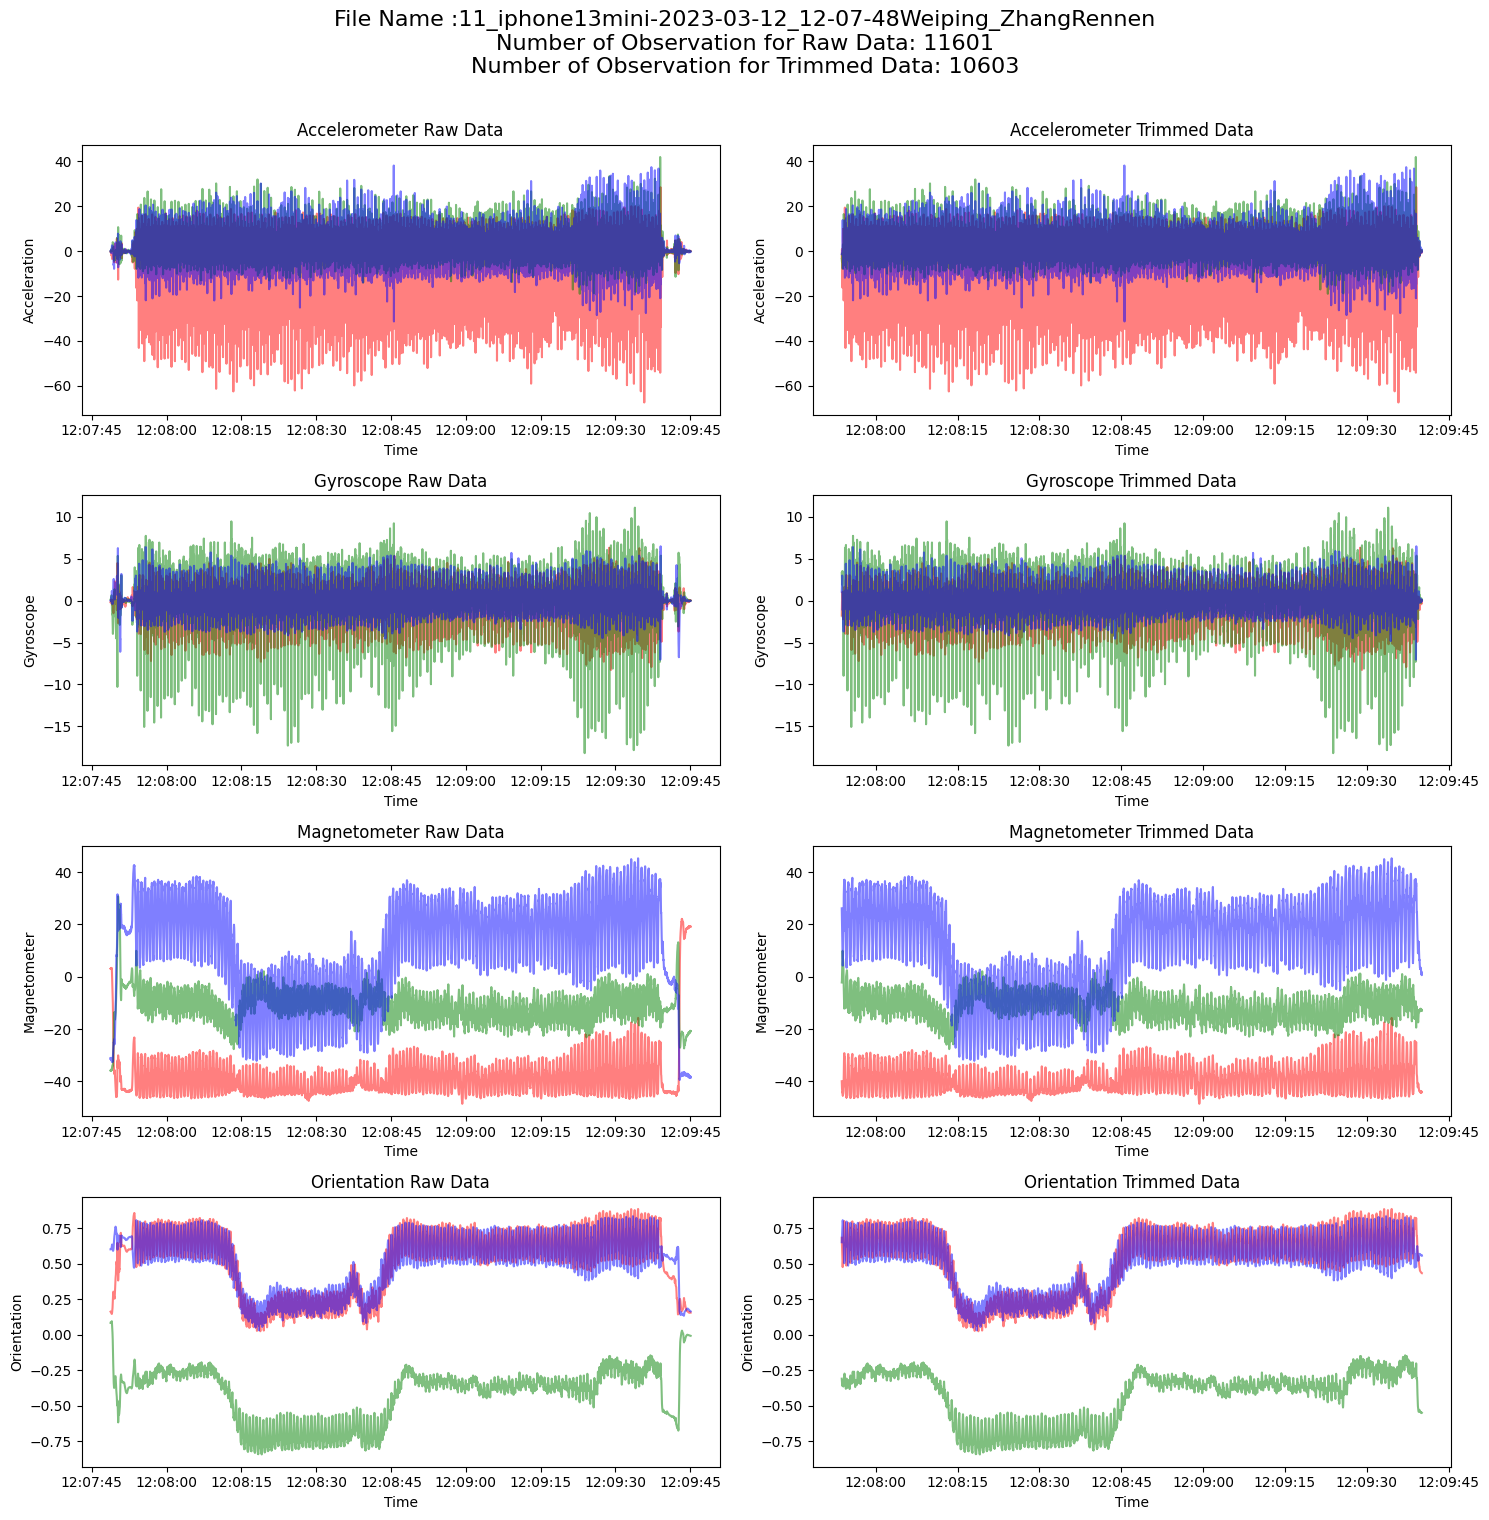

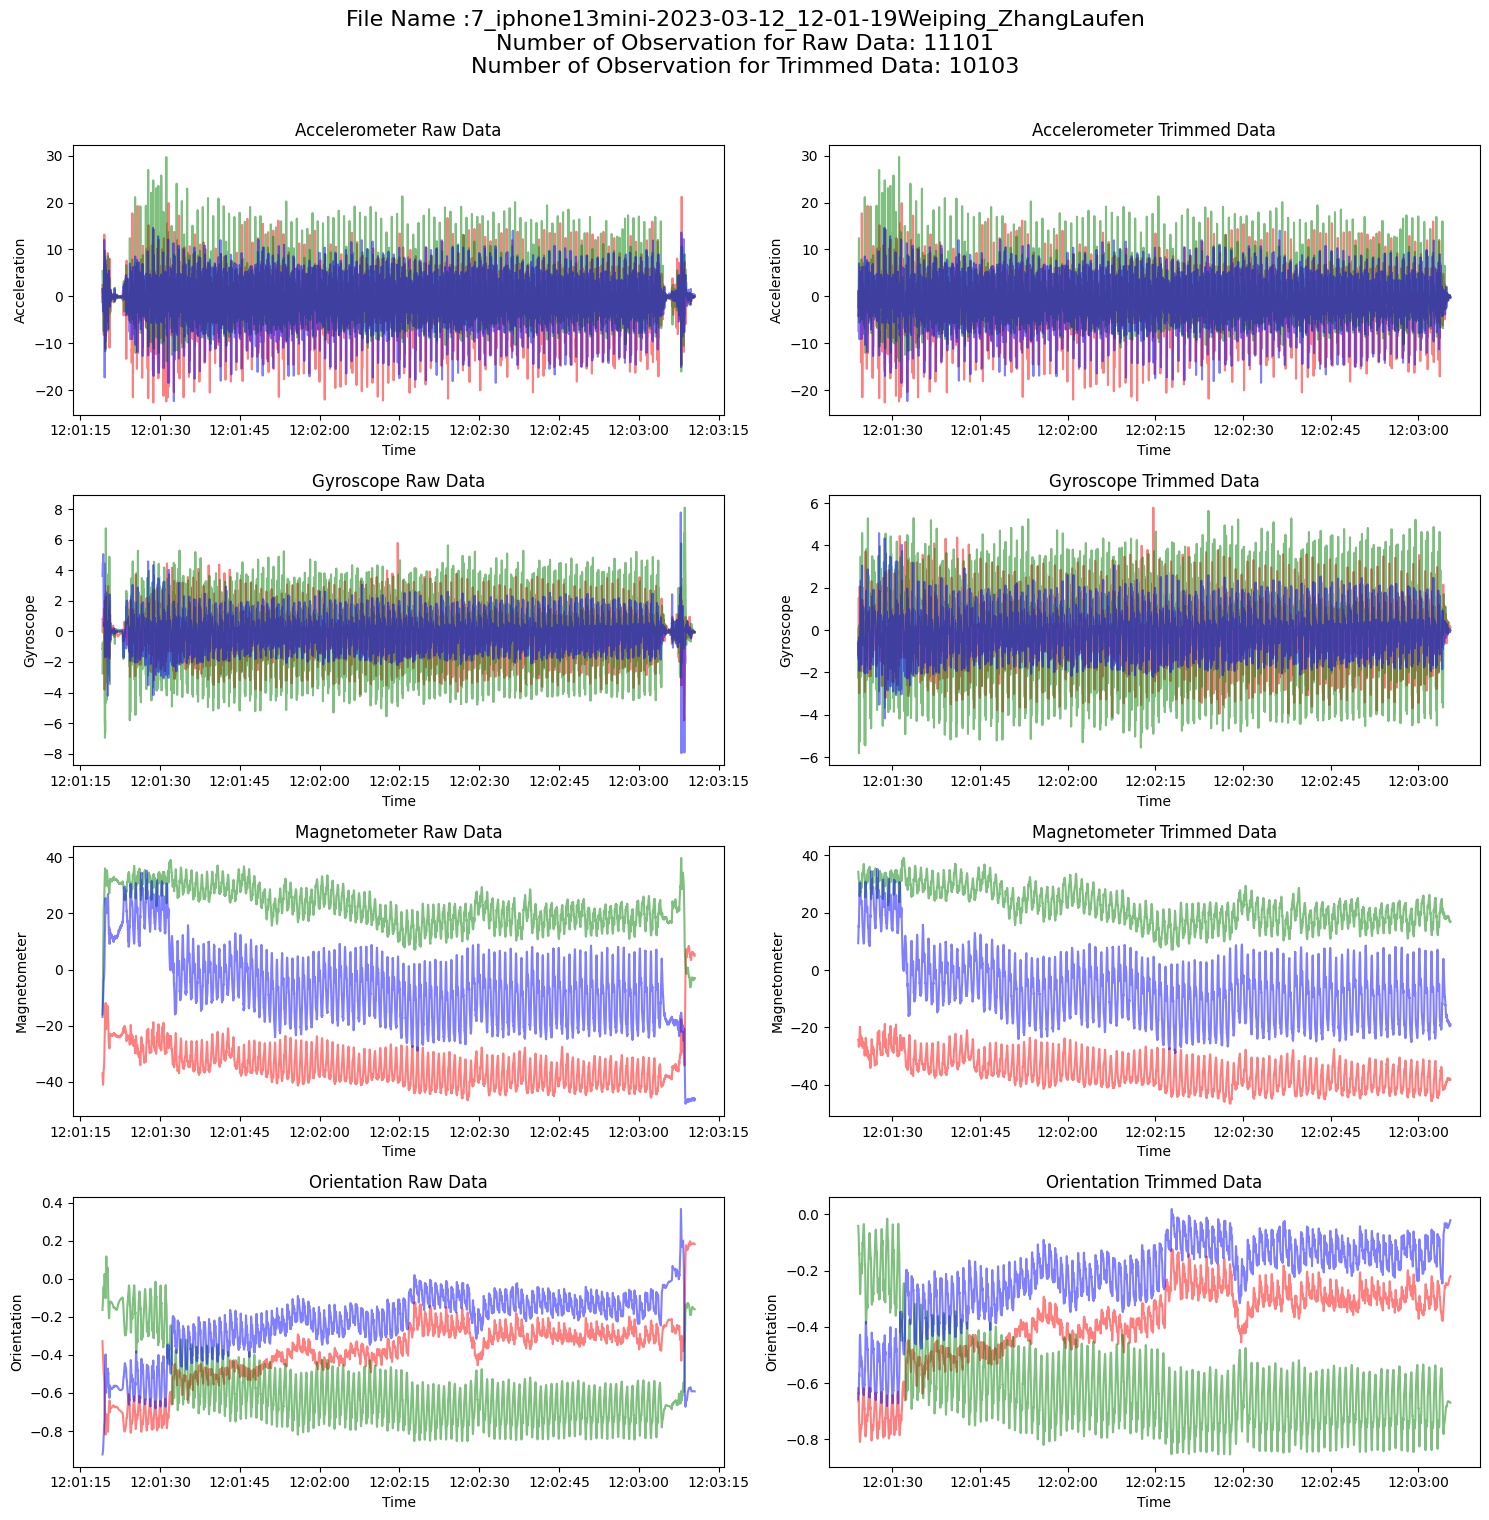

KeyboardInterrupt: 

In [14]:
# now we are creating a for loop to first filter the data for each file and then plot the data
for file in random_files: # alternative random_files -> all_files
    # filter data for each file
    data_raw_filtered = data_raw[data_raw['id_combined'] == file]
    data_trimmed_filtered = data_trimmed[data_trimmed['id_combined'] == file]

    # call sensor_plot function
    sensor_plot(data_raw_filtered, data_trimmed_filtered, file)

---
# Anzahl Messungen pro Person und Bewegungsprofil

In [15]:
# function to get number of measurements per user and class
def get_n_obs(data):
    return pd.DataFrame(data.groupby(["id", "user", "class"]).first().groupby(["user", "class"]).count().sort_values(["user", "class"]).iloc[:, 0]).reset_index()

# get number of measurements per user and class before and after trimming
data_n_obs = get_n_obs(data_raw).rename(columns={'time': 'number of measurements total'})
# display data_n_obs 
#display("Number of measurements per user and class", data_n_obs.head())

data_n_obs_trimmed = get_n_obs(data_trimmed).rename(columns={'time': 'number of measurements trimmed'})
# display data_n_obs_trimmed
#display("Number of measurements per user and class", data_n_obs_trimmed.head())

# combine data_n_obs and data_n_obs_trimmed
data_merged = data_n_obs.merge(data_n_obs_trimmed, on=['user', 'class'])
# display data_merged
#display("Data merged DataFarme", data_merged.head())

# melt data_merged
data_merged = data_merged.melt(id_vars=['user', 'class'], value_vars=['number of measurements total', 'number of measurements trimmed'], var_name='total_or_trimmed', value_name='number_of_measurements')
# display data_merged
#display("Data merged DataFarme", data_merged.head())

# display data_merged example
display("Number of measurements per user and class", data_merged[data_merged['user'] == 'Ben_Tran'])


'Number of measurements per user and class'

,user,class,total_or_trimmed,number_of_measurements
0,Ben_Tran,Laufen,number of measurements total,8
1,Ben_Tran,Rennen,number of measurements total,11
2,Ben_Tran,Sitzen,number of measurements total,13
3,Ben_Tran,Stehen,number of measurements total,12
4,Ben_Tran,Treppenlaufen,number of measurements total,18
5,Ben_Tran,Velofahren,number of measurements total,12
49,Ben_Tran,Laufen,number of measurements trimmed,8
50,Ben_Tran,Rennen,number of measurements trimmed,11
51,Ben_Tran,Sitzen,number of measurements trimmed,13
52,Ben_Tran,Stehen,number of measurements trimmed,12


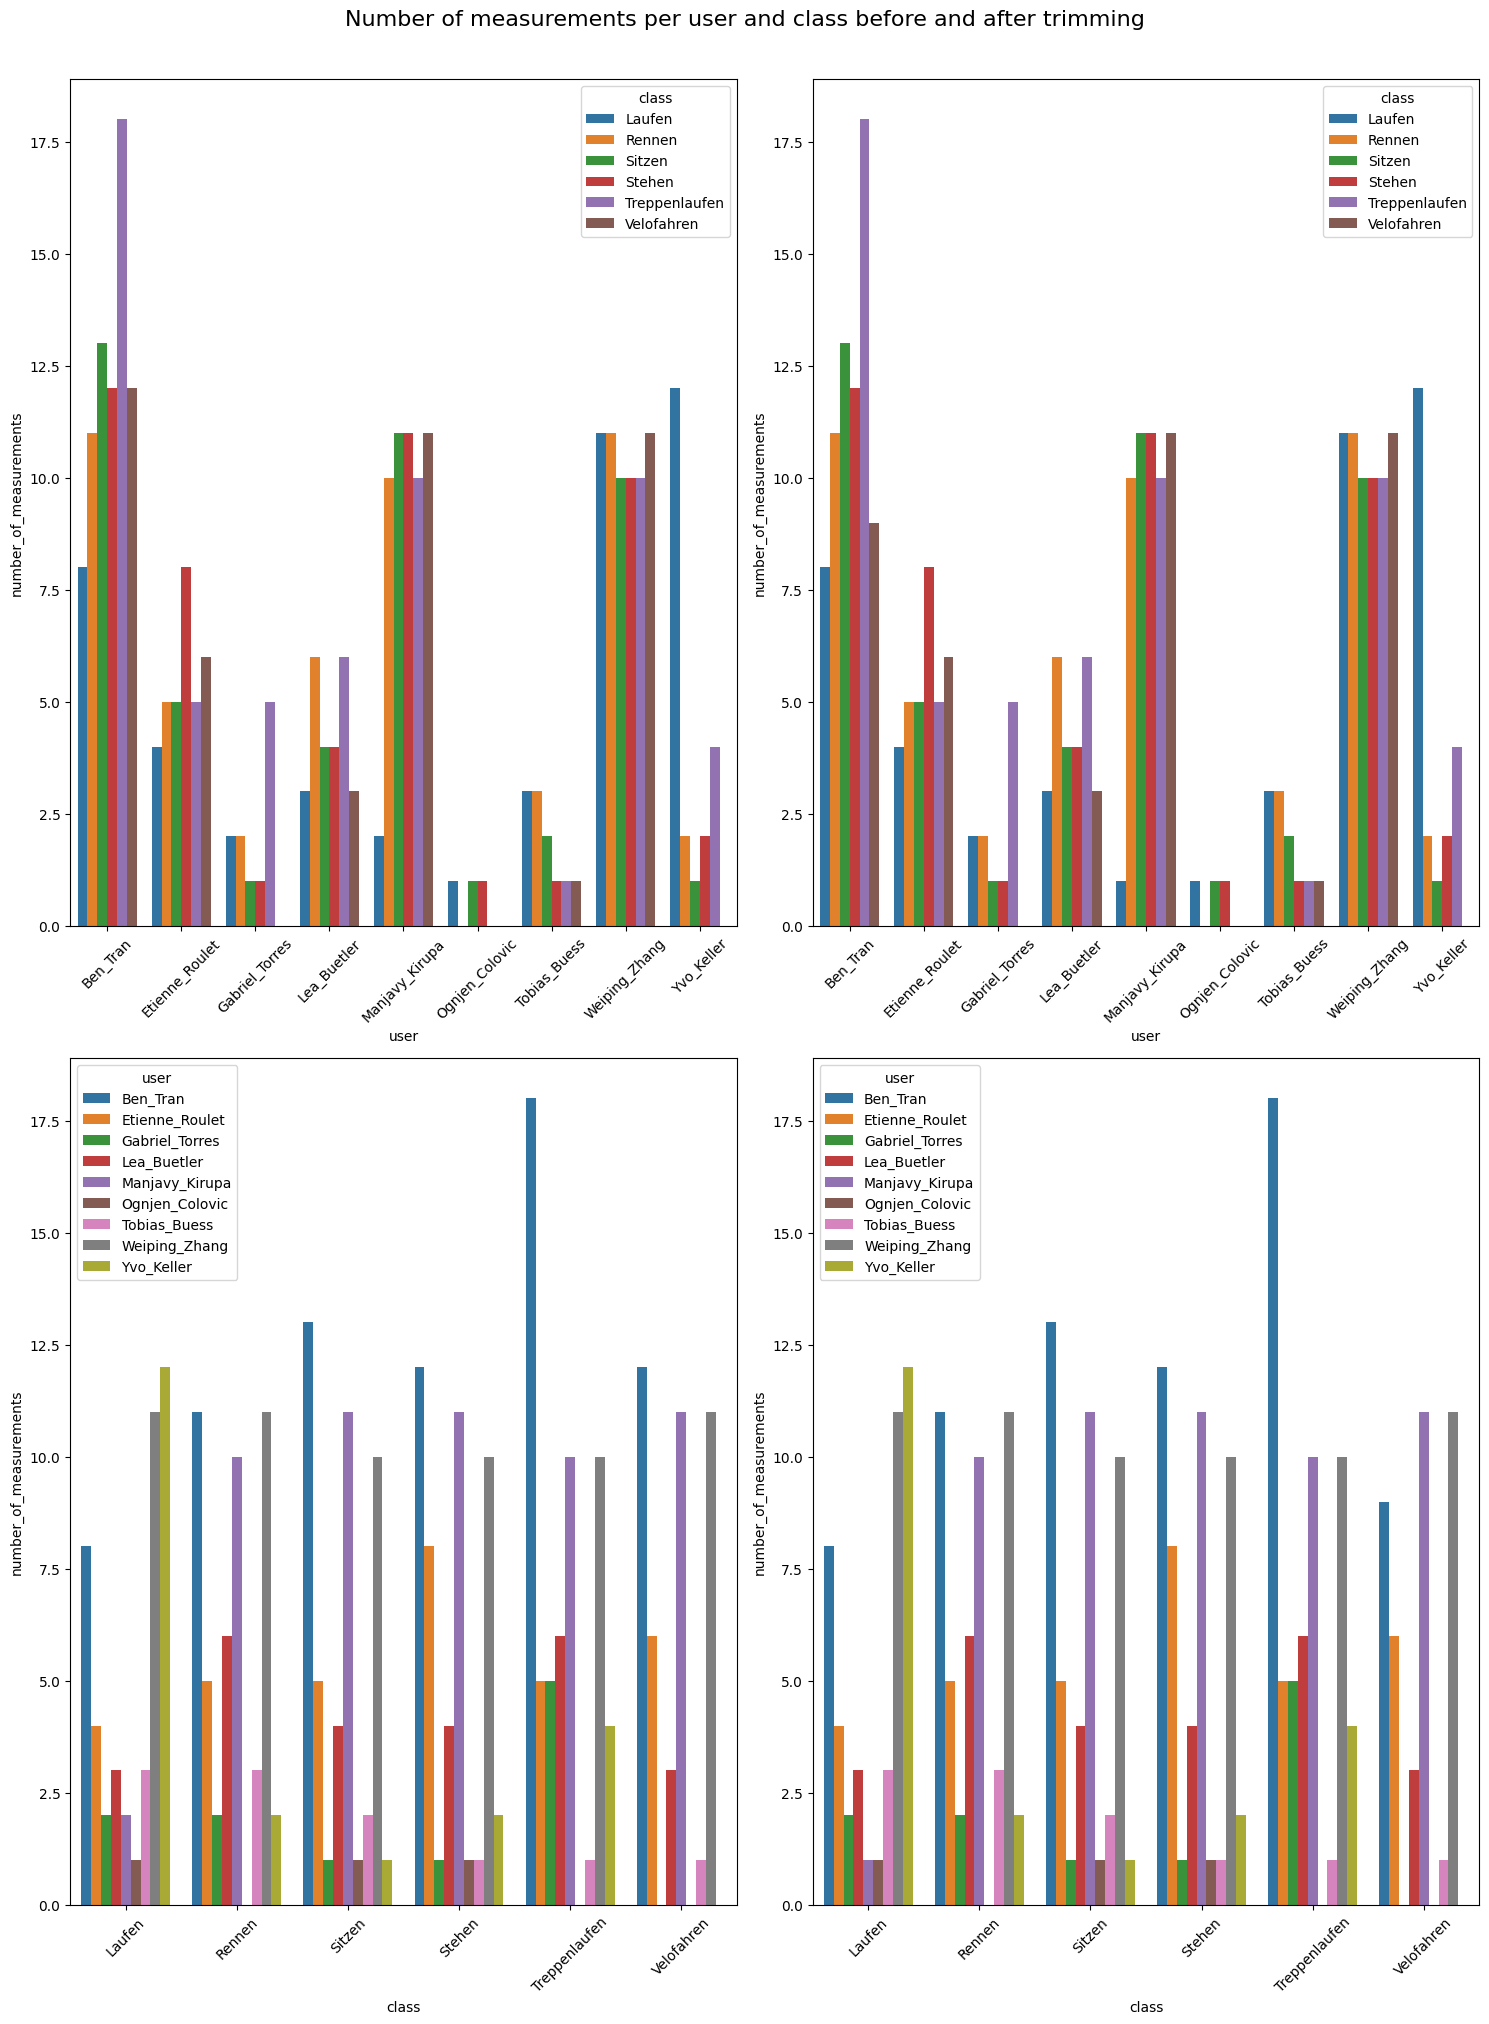

In [ ]:
# plot number of measurements per user and class before and after trimming
fig, ax = plt.subplots(2, 2, figsize=(15, 20))
sns.barplot(x="user", y="number_of_measurements", hue="class", data=data_merged[data_merged['total_or_trimmed'] == 'number of measurements total'], ax=ax[0, 0])
sns.barplot(x="user", y="number_of_measurements", hue="class", data=data_merged[data_merged['total_or_trimmed'] == 'number of measurements trimmed'], ax=ax[0, 1])
sns.barplot(x="class", y="number_of_measurements", hue="user", data=data_merged[data_merged['total_or_trimmed'] == 'number of measurements total'], ax=ax[1, 0])
sns.barplot(x="class", y="number_of_measurements", hue="user", data=data_merged[data_merged['total_or_trimmed'] == 'number of measurements trimmed'], ax=ax[1, 1])
#rotate xticks
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)
fig.suptitle('Number of measurements per user and class before and after trimming', fontsize=16, y=1.01)
plt.tight_layout()
plt.show()

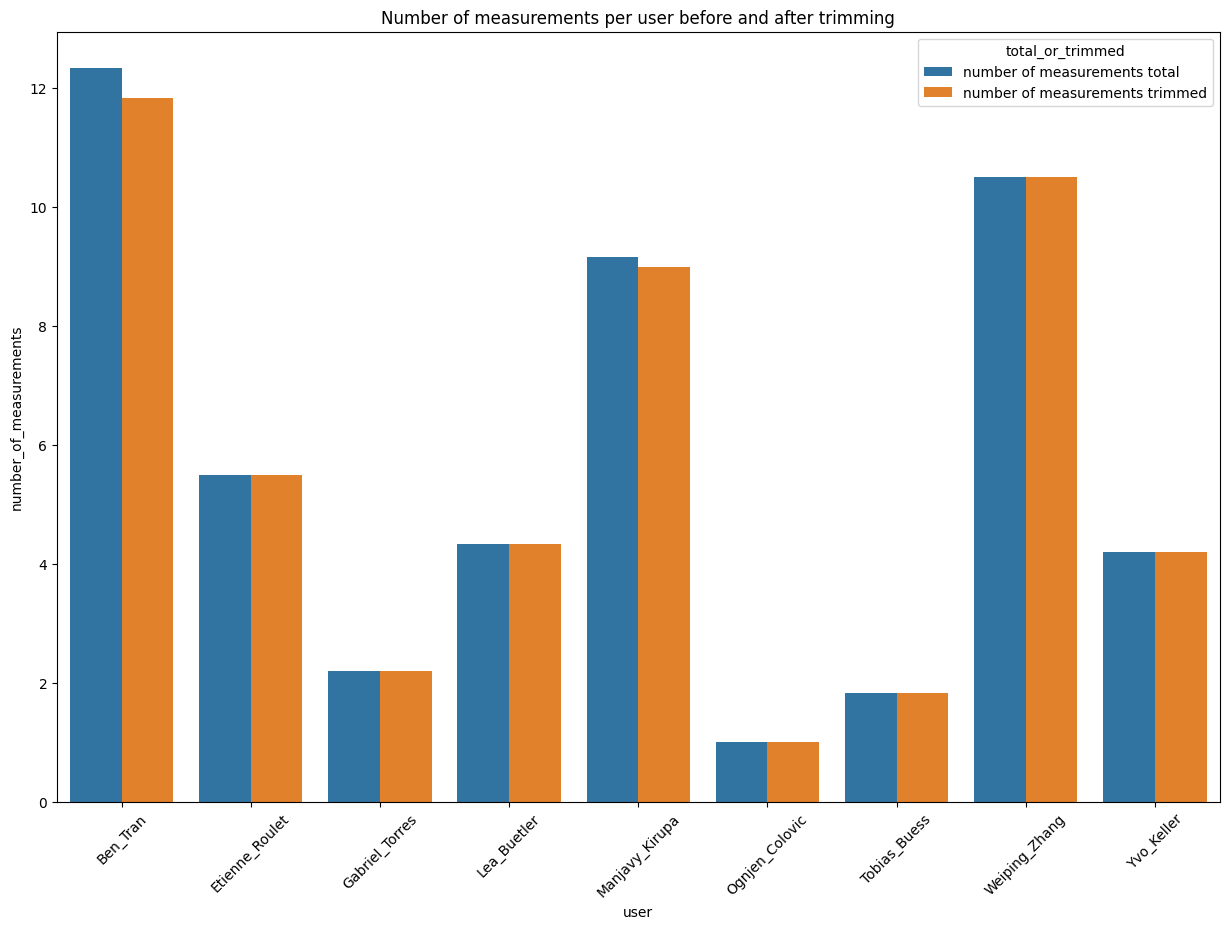

In [ ]:
# barplot of number of measurements per user before and after trimming
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.barplot(x='user', y='number_of_measurements', hue='total_or_trimmed', data=data_merged, ax=ax, errorbar=None)
ax.set_title('Number of measurements per user before and after trimming')
plt.xticks(rotation=45)
plt.show()

---
# Daten in 5 Sekunden Zeitfenster aggregieren

Die Idee ist, dass wir aus einer Messung ein Zeitfenster von bsp. 5 Sekunden definieren und daraus die Sensorwerten aggegrieren mittels mean, median, min, max etc... 
Stichwort: Groupby / Rolling mean


Beim Rolling Mean ist es wichtig, dass die Frequenz (Anzahl Observationen pro Sekunde) von allen Datensaetzen gleich bleibt. 

In [62]:
# get length of all files
len_is_null = 0
for file in tqdm(all_files):
    if len(data_trimmed[data_trimmed['id_combined'] == file]) == 0:
        print(file)
        len_is_null += 1

  7%|▋         | 20/297 [00:02<00:37,  7.45it/s]

02_iPhone12-2023-03-08_14-43-12Manjavy_KirupaLaufen


 87%|████████▋ | 257/297 [00:31<00:04,  8.36it/s]

03_SamsungA22-2023-02-27_15-41-54Ben_TranVelofahren


 87%|████████▋ | 259/297 [00:32<00:04,  8.29it/s]

05_SamsungA22-2023-02-27_15-45-25Ben_TranVelofahren
06_SamsungA22-2023-02-27_15-47-24Ben_TranVelofahren


100%|██████████| 297/297 [00:37<00:00,  8.02it/s]


In [64]:
# filter id_combined by 9_iphone13mini-2023-03-11_13-09-56Weiping_ZhangVelofahren'
testdata = data_trimmed[data_trimmed['id_combined'] == '01_iPhone14-2023-02-25-2023-02-25_14-17-47Ognjen_ColovicLaufen']
# display testdata'
display("Test Data", testdata.head())

# print of shape
print("Shape of Test Data: ", testdata.shape)

'Test Data'

,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class,id_combined
123719,2023-02-25 14:17:52.861,0.245857,-0.244612,-0.610946,0.142192,0.089088,-0.064882,-22.427994,-30.804256,-37.728760,0.066913,0.297632,0.951772,01_iPhone14-2023-02-25-2023-02-25_14-17-47,Ognjen_Colovic,Laufen,01_iPhone14-2023-02-25-2023-02-25_14-17-47Ognj...
123720,2023-02-25 14:17:52.871,0.402074,-0.275943,-0.423922,0.239407,0.110246,-0.050938,-22.459976,-30.977966,-37.849854,0.066385,0.298609,0.951501,01_iPhone14-2023-02-25-2023-02-25_14-17-47,Ognjen_Colovic,Laufen,01_iPhone14-2023-02-25-2023-02-25_14-17-47Ognj...
123721,2023-02-25 14:17:52.881,0.559974,-0.330447,-0.076275,0.307556,0.084504,-0.010573,-22.368515,-31.132961,-37.538605,0.065904,0.299974,0.951109,01_iPhone14-2023-02-25-2023-02-25_14-17-47,Ognjen_Colovic,Laufen,01_iPhone14-2023-02-25-2023-02-25_14-17-47Ognj...
123722,2023-02-25 14:17:52.891,0.314691,-0.322093,0.344114,0.321166,0.034526,-0.020262,-22.341492,-31.206844,-37.751251,0.065650,0.301509,0.950645,01_iPhone14-2023-02-25-2023-02-25_14-17-47,Ognjen_Colovic,Laufen,01_iPhone14-2023-02-25-2023-02-25_14-17-47Ognj...
123723,2023-02-25 14:17:52.901,0.120378,-0.311056,0.708103,0.281128,0.050093,-0.048637,-22.167236,-31.264812,-37.399048,0.065479,0.302991,0.950186,01_iPhone14-2023-02-25-2023-02-25_14-17-47,Ognjen_Colovic,Laufen,01_iPhone14-2023-02-25-2023-02-25_14-17-47Ognj...


Shape of Test Data:  (143501, 17)


In [65]:
def calculate_rolling_stats(df, window_size_in_seconds, verbose_freq = False):
    '''
    This function takes a dataframe, calculates its HZ rate and
    then uses that to calculate the rolling statstics for the defined windows size in seconds.
    returns a pandas dataframe concated with the rolling stats.

    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe to calculate the rolling statistics for.
    window_size_in_seconds : int
        The window size in seconds.
    verbose_freq : bool, optional
        If True, the function will print the HZ rate. The default is False.

    Returns
    -------
    df_with_rolling_stats : pandas.DataFrame
        The dataframe with the rolling statistics.
    '''

    # drop the index column and keep it
    df = df.reset_index()

    # Convert time column to datetime index
    df.index = pd.to_datetime(df['time'])

    # Calculate time difference between consecutive rows, using the index
    dt = df.index.to_series().diff().dropna()

    # set new index with index column 
    df = df.set_index('index')

    # Infer the sampling frequency
    freq = pd.Timedelta('1s') / dt.median() # not mean because of outliers

    if verbose_freq:
        print("{:.2f} samples per seconds, which means {:.2f} Hz,".format(freq, freq))

    # Calculate the number of samples in the specified window size
    num_samples = int(window_size_in_seconds * freq)

    # filter for numerical columns before we aggregate
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df_numeric = df[numeric_cols]

    # Calculate the rolling statistics
    rolling_stats = df_numeric.rolling(window=num_samples).agg(['min', 'max', 'mean', 'median'])
    rolling_stats.columns = rolling_stats.columns.map('_'.join)

    # Concatenate the rolling statistics with the original DataFrame
    df_with_rolling_stats = pd.concat([df, rolling_stats], axis=1)

    return df_with_rolling_stats

In [71]:
# call the function with the datatest dataframe
calculate_rolling_stats(testdata, window_size_in_seconds=5, verbose_freq=True)

100.00 samples per seconds, which means 100.00 Hz,


,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,...,Orientation_qx_mean,Orientation_qx_median,Orientation_qy_min,Orientation_qy_max,Orientation_qy_mean,Orientation_qy_median,Orientation_qz_min,Orientation_qz_max,Orientation_qz_mean,Orientation_qz_median
index,,,,,,,,,,,,,,,,,,,,,
123719,2023-02-25 14:17:52.861,0.245857,-0.244612,-0.610946,0.142192,0.089088,-0.064882,-22.427994,-30.804256,-37.728760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123720,2023-02-25 14:17:52.871,0.402074,-0.275943,-0.423922,0.239407,0.110246,-0.050938,-22.459976,-30.977966,-37.849854,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123721,2023-02-25 14:17:52.881,0.559974,-0.330447,-0.076275,0.307556,0.084504,-0.010573,-22.368515,-31.132961,-37.538605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123722,2023-02-25 14:17:52.891,0.314691,-0.322093,0.344114,0.321166,0.034526,-0.020262,-22.341492,-31.206844,-37.751251,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123723,2023-02-25 14:17:52.901,0.120378,-0.311056,0.708103,0.281128,0.050093,-0.048637,-22.167236,-31.264812,-37.399048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267215,2023-02-25 14:41:49.220,-0.046901,0.404446,-0.586288,-0.762845,0.573988,0.729486,-10.940460,-34.376259,-12.137512,...,0.582945,0.677291,-0.338638,0.327703,-0.041190,-0.087304,0.380585,0.875095,0.625076,0.573569
267216,2023-02-25 14:41:49.230,0.086672,0.638244,-0.808785,-0.766600,0.919351,0.880557,-11.204910,-34.526787,-12.501556,...,0.581915,0.677243,-0.338638,0.327703,-0.040893,-0.087304,0.380585,0.875095,0.625843,0.573889
267217,2023-02-25 14:41:49.240,0.299090,0.661232,-0.925513,-0.473973,1.457123,0.982194,-11.567795,-34.295078,-13.018036,...,0.580861,0.676083,-0.338638,0.327703,-0.040606,-0.087304,0.380585,0.875095,0.626644,0.574148


In [69]:
# create empty dataframe
data_trimmed_aggregated = pd.DataFrame()

# iterate thorugh every file and calculate the rolling stats
for file in tqdm(all_files):

    # filter data_trimmed by file
    data_trimmed_filtered = data_trimmed[data_trimmed['id_combined'] == file]

    # check lenght of dataframe, if 0 skip the file and continue with the next file
    if len(data_trimmed_filtered) == 0:
        continue
    
    # call calculate_rolling_stats function
    data_trimmed_filtered = calculate_rolling_stats(data_trimmed_filtered, window_size_in_seconds=5, verbose_freq = False)

    # concat to data_trimmed_aggeraged
    data_trimmed_aggregated = pd.concat([data_trimmed_aggregated, data_trimmed_filtered], axis = 0)

    # display tail of data_trimmed_aggregated
    # display("Data Trimmed Aggregated", data_trimmed_aggregated.tail())

# display data_trimmed_aggregated
display("Data Trimmed Aggregated", data_trimmed_aggregated)

100%|██████████| 297/297 [02:13<00:00,  2.22it/s]


'Data Trimmed Aggregated'

,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,...,Orientation_qx_mean,Orientation_qx_median,Orientation_qy_min,Orientation_qy_max,Orientation_qy_mean,Orientation_qy_median,Orientation_qz_min,Orientation_qz_max,Orientation_qz_mean,Orientation_qz_median
index,,,,,,,,,,,,,,,,,,,,,
1,2023-02-27 15:02:17.156,0.000000,9.722000,1.278000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-02-27 15:02:31.574,-0.728000,9.779000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.319200,-0.319200,-0.719579,0.568356,-0.075612,-0.075612,-0.598058,0.631111,0.016527,0.016527
3,2023-02-27 15:02:16.685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.500000,-13.143750,...,-0.210325,-0.210325,0.000000,0.568356,0.284178,0.284178,-0.598058,0.000000,-0.299029,-0.299029
4,2023-02-27 15:02:32.295,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.012501,0.000000,20.587502,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2023-02-27 15:02:33.285,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-22.612501,0.000000,20.268751,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539029,2023-03-11 13:11:56.901,2.507094,4.691251,-0.583939,0.246416,0.067954,0.365369,-4.043274,6.146469,44.221630,...,0.864198,0.870878,-0.029589,0.248620,0.122706,0.132622,0.282121,0.556093,0.450704,0.453745
2539030,2023-03-11 13:11:56.911,1.888469,3.766656,-0.826295,0.196101,0.019053,0.352243,-3.925354,6.195618,44.229263,...,0.864512,0.871409,-0.028672,0.248620,0.122759,0.132622,0.282121,0.556093,0.450169,0.452909
2539031,2023-03-11 13:11:56.921,0.994240,3.075035,-0.740944,0.105015,-0.027495,0.306060,-3.801758,6.023056,43.900330,...,0.864825,0.871541,-0.027644,0.248620,0.122807,0.132622,0.282121,0.556093,0.449634,0.452068
